# FEBRIO AKBAR
# Final Project of Dibimbing Bootcamp
## Airline Passanger Satisfaction Analysis, Model and Improvement

### DATASET INFORMATION

Attribute Information:

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- flight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival

Label:
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import string
from random import seed
from random import sample
from IPython.display import Image
from IPython.core.display import HTML 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier, plot_importance
from yellowbrick.model_selection import FeatureImportances, LearningCurve
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
sns.set_theme(style="whitegrid")

In [2]:
Image(url= "https://freepngimg.com/thumb/plane/2-2-plane-png-clipart.png", width=750, height=750)

## IMPORT DATASET

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Merge Datasets to make main dataset

In [4]:
df = pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## EXPLORATORY DATA ANALYSIS - EDA

In [5]:
df.shape

(129880, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [7]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Drop First and Second row because it's useless

#### It's not make any impact for the model

In [8]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

## Convert columns into 'Categorical' type

In [9]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df_cat = df.copy()
df_cat.iloc[:,categorical_indexes] = df_cat.iloc[:,categorical_indexes].astype('category')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding            

## Find Missing Values

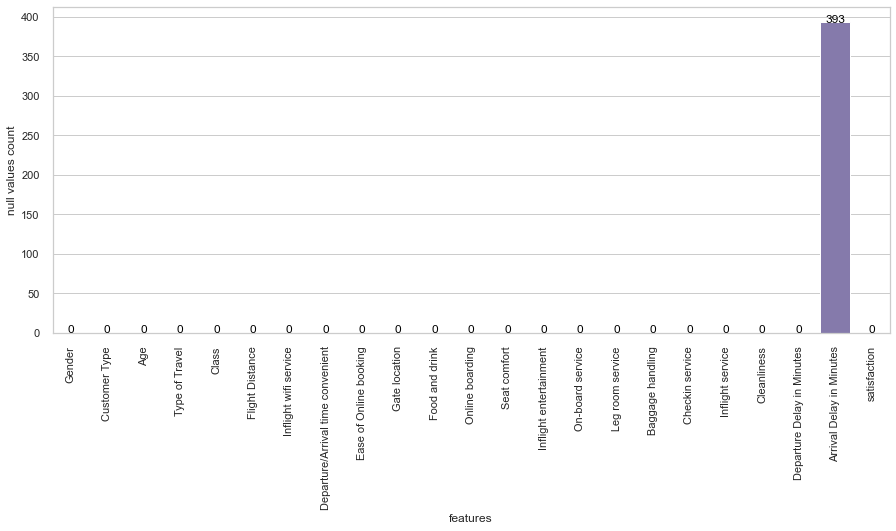

In [10]:
null_df = df.isnull().sum().reset_index()
plt.figure(figsize=(15,6))
ax = sns.barplot(null_df["index"], null_df[0], color = 'm')
ax.set(xlabel="features", ylabel="null values count")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
ax.set_ylim(0)
[ax.text(index,value[1],value[1], color='black', ha="center") for index,value in enumerate(null_df.values)]
plt.show()

## Missing Value Handling
### Drop row that has NaN value in "Arrival Delay in Minutes" features
We do not replace the NaN value because it is just 0.03% of the data and will not give significant effect

In [11]:
df = df[df['Arrival Delay in Minutes'].notnull()]
df.shape

(129487, 23)

## PROBLEM STATEMENT

([<matplotlib.patches.Wedge at 0x2578b5f27f0>,
 [Text(-0.2247604167608792, 1.0767928097166493, 'Neutral or dissatisfied'),
  Text(0.22476041676087954, -1.0767928097166493, 'Satisfied')],
 [Text(-0.12259659096047956, 0.5873415325727177, '56.6%'),
  Text(0.12259659096047974, -0.5873415325727177, '43.4%')])

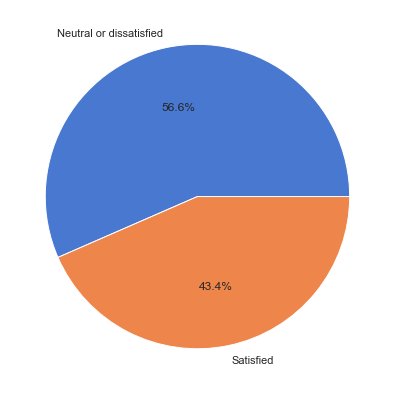

In [12]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("muted"), autopct = '%1.1f%%')

From the pie chart, we can see the customer that feels Neutral or Dissatisfied is a lot more than the satisfied ones. So, this is becoming a problem for the airline company.

Business Question:
1. What features that gave the biggest impact on customers satisfaction?
2. How do features relate to each other, especially the satisfaction?
3. How to improve customers satisfaction?

## COLLECTING BUSINESS INSIGHT

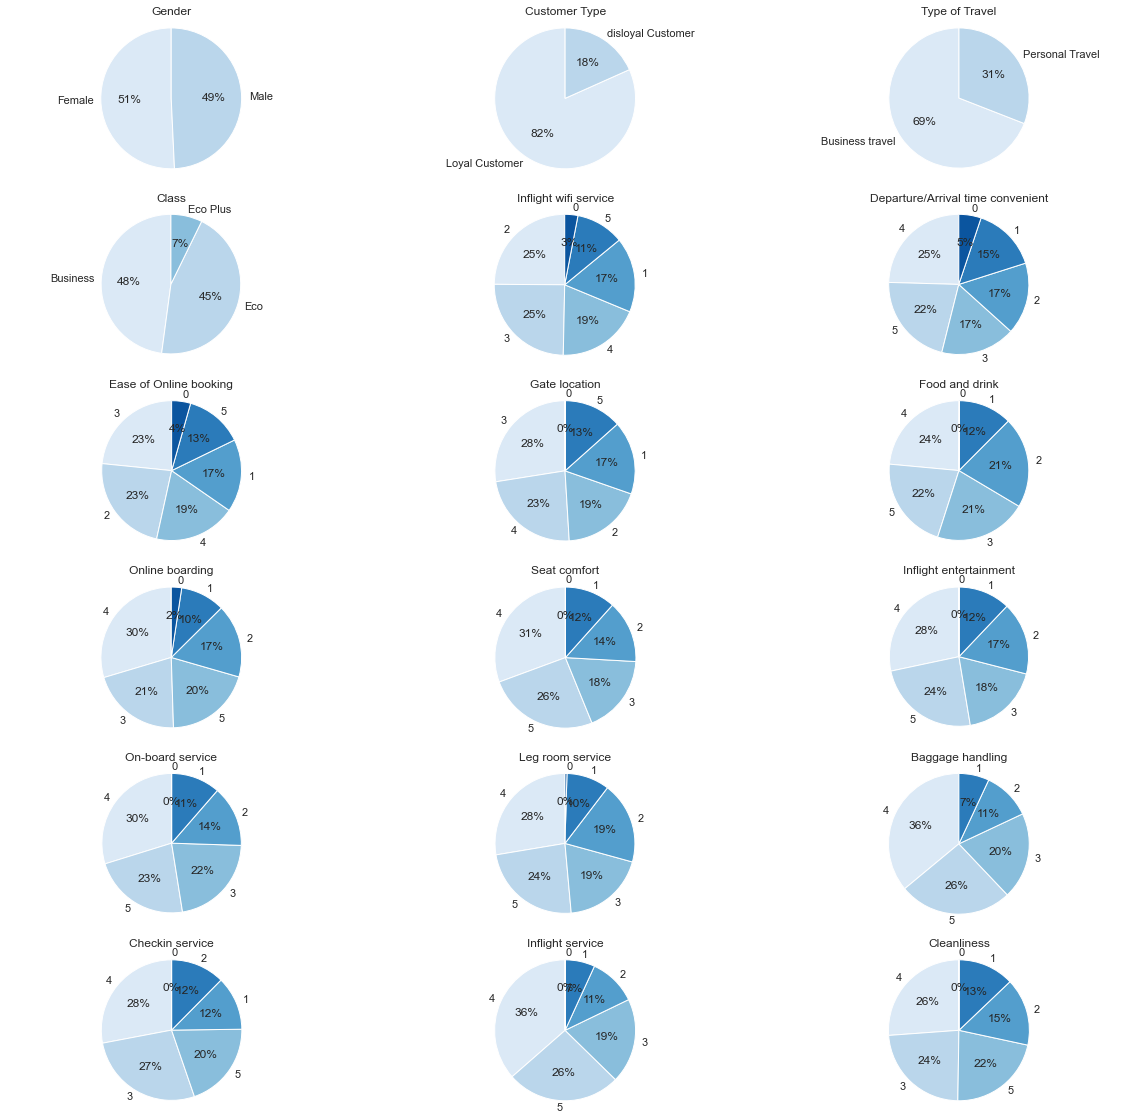

In [13]:
categ = df_cat.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Blues"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

some conclusions about the considered sample:

* The number of men and women in this sample is approximately the same
* The vast majority of the airline's customers are repeat customers
* Most of our clients flew for business rather than personal reasons
* About half of the passengers were in business class
* More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5)
* More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)

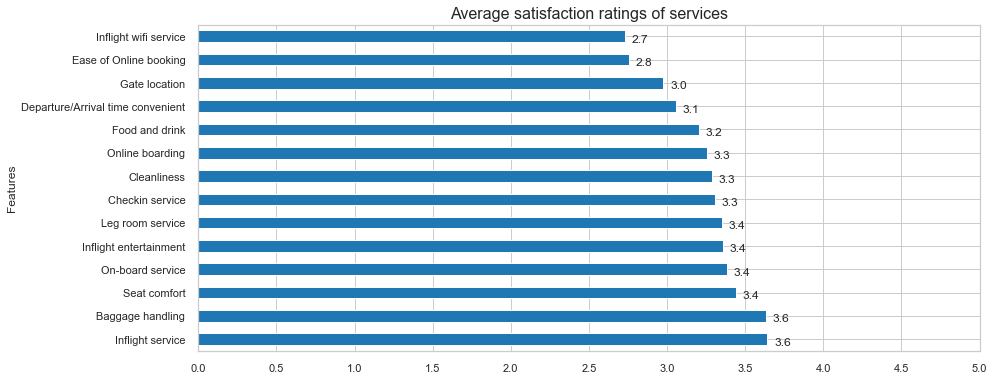

In [14]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

total = float(len(df))
ax = df[categorics].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="tab20",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
plt.title('Average satisfaction ratings of services', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

The average service satisfaction rating data above shows that most features are above the midpoint, which is a value of 3. Inflight service and baggage handling get an average rating of 3.6, which shows that the current implementation is quite good. But on the other hand, inflight wifi service and ease of online booking are still quite low and need improvement.

<AxesSubplot:xlabel='Age', ylabel='Density'>

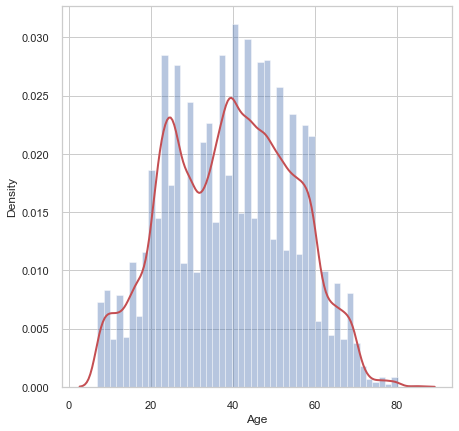

In [15]:
sns.distplot(df['Age'], kde_kws={"color": "r", "lw": 2, "label": "KDE"})

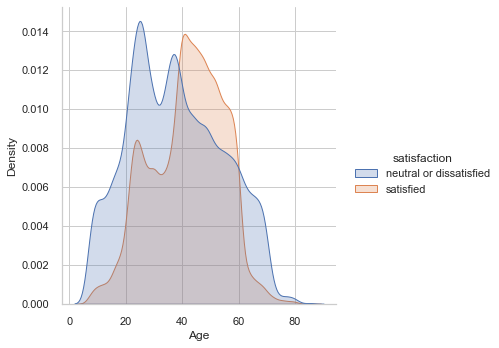

In [16]:
sns.displot(df, x="Age", hue="satisfaction", kind="kde",fill=True)

Age distribution data shows that the majority of airline service users are between 25 and 60 years old, where this age is a person's productive period at work. Satisfied customers are mostly aged 40 years and over. On the other hand, customers who are still dissatisfied are mostly 40 years old and under. This age distribution shows the customer segmentation of this company.

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

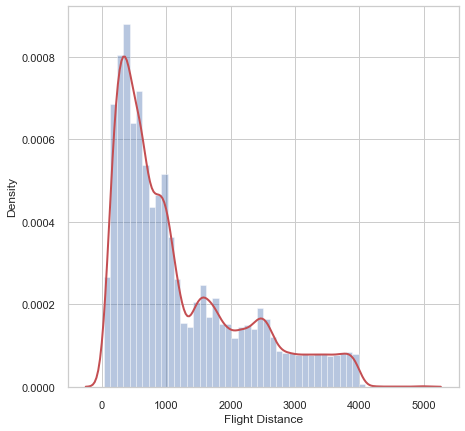

In [17]:
sns.distplot(df['Flight Distance'], kde_kws={"color": "r", "lw": 2, "label": "KDE"})

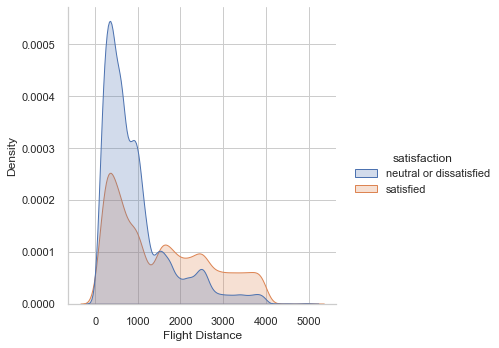

In [18]:
sns.displot(df, x="Flight Distance", hue="satisfaction", kind="kde",fill=True)

The distribution of flight distances shows that airlines tend to serve flights under 1500 km. Interestingly, the majority of passengers who fly above 1500 km are satisfied compared to those who take short flights.

(0.0, 150.0)

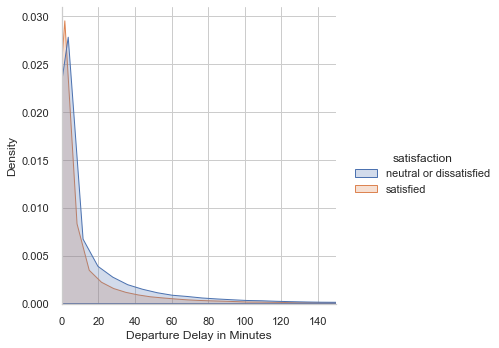

In [19]:
sns.displot(df, x="Departure Delay in Minutes", hue="satisfaction", kind="kde",fill=True)
plt.xlim(0, 150)

The graph of the distribution of the length of time delay in departure does not show a significant difference between those who are satisfied and those who are not.

Text(0.5, 1.0, 'Satisfaction (Male)')

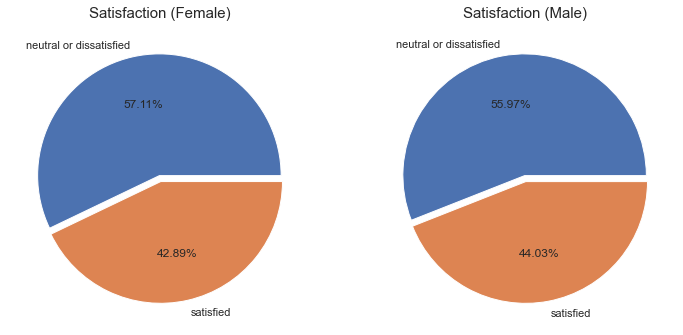

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.loc[df.Gender=="Female",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Satisfaction (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.loc[df.Gender=="Male",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Satisfaction (Male)', fontsize=15)

The distribution of dissatisfied and satisfied passengers in the male and female categories does not show a significant difference.

Text(0.5, 1.0, 'Satisfaction (Disloyal Customer)')

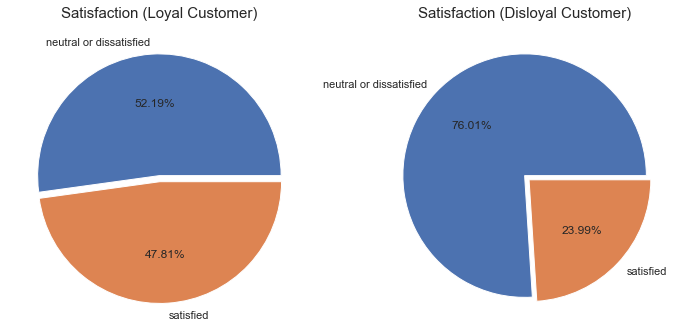

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.loc[df['Customer Type']=="Loyal Customer",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Satisfaction (Loyal Customer)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.loc[df['Customer Type']=="disloyal Customer",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%')
plt.title('Satisfaction (Disloyal Customer)', fontsize=15)

More than 3/4 of 'Disloyal' customers are dissatisfied with what they get, this is certainly natural. Uniquely, the majority of customers who have entered the 'Loyal' category are still not satisfied with the airline. So the airline has a great potential to lose loyal customers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

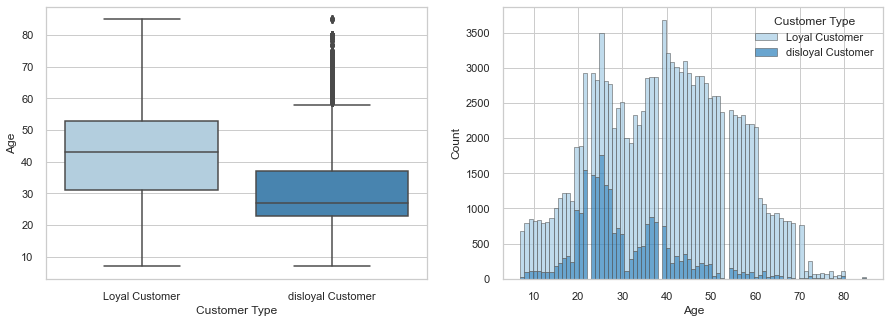

In [22]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

From the graph above, it can be seen that loyal customers usually come from circles over the age of 30 years.

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

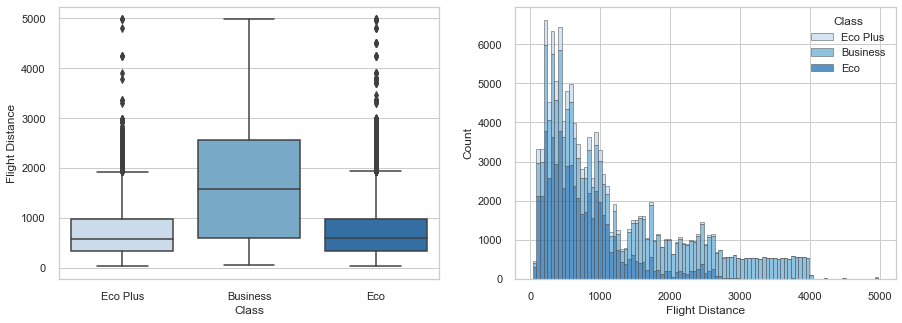

In [23]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

From the graph above, it can be seen that airlines tend to assign aircraft with the majority of business-class types on long trips. Meanwhile, the Eco and Eco Plus classes cater for short-haul flights under 1000 km.

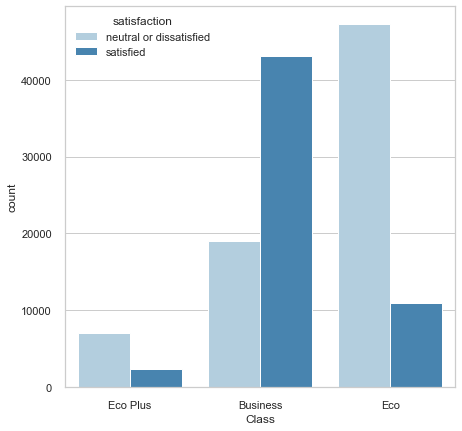

In [24]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "Blues", data = df)
plt.show()

Service in business class has been sufficient to guarantee customer satisfaction. But unfortunately, it is inversely proportional to what customers feel in the Eco and Eco Plus classes who are still very dissatisfied with what they get.

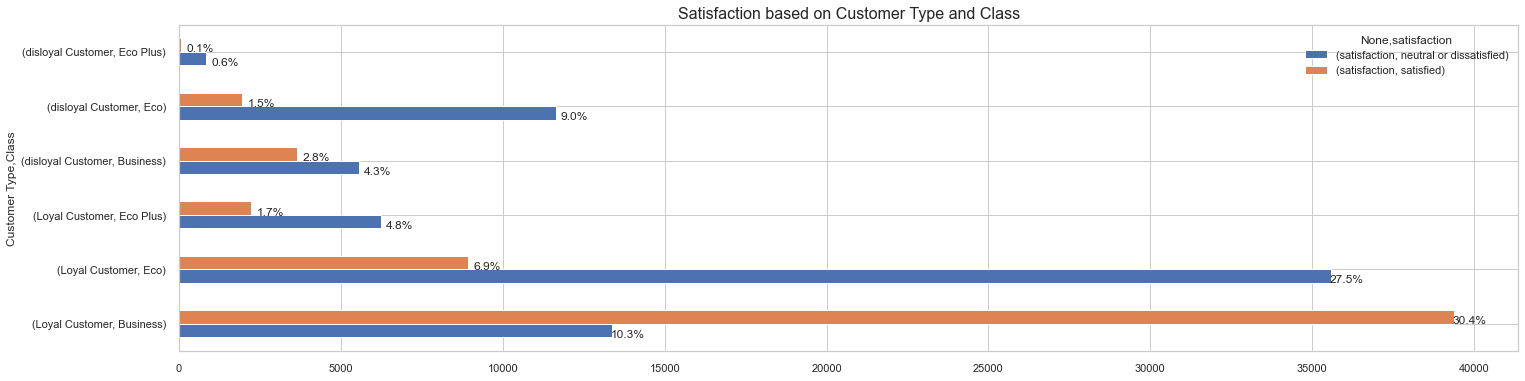

In [25]:
ax = df.pivot_table(index=["Customer Type","Class"],columns=["satisfaction"],aggfunc={"satisfaction":"count"}).plot(kind="barh",figsize=(24,6))
total = float(len(df))
plt.title('Satisfaction based on Customer Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1000, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

From this it can be seen that only customers who fall into the "Loyal" category and are in the business class are the majority satisfied. Even "Disloyal" customers who are in business class are mostly dissatisfied. The difference also looks significant in other flight classes.

This shows that there seems to be a difference in treatment between "Loyal" and "Disloyal" customers.

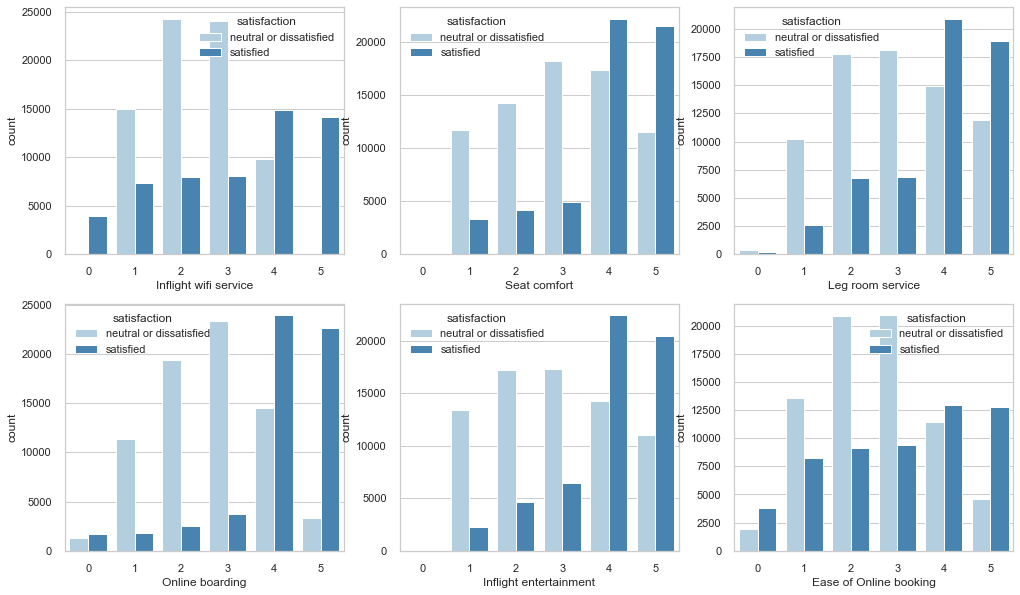

In [26]:
f, ax = plt.subplots(2, 3, figsize = (17,10))
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "Blues", data = df ,ax = ax[0,0])
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "Blues", data = df,ax = ax[0,1])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[0,2])
sns.countplot(x = 'Online boarding', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[1,0])
sns.countplot(x = 'Inflight entertainment', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[1,1])
sns.countplot(x = 'Ease of Online booking', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[1,2])
plt.show()

All features show that if the rating given is above 3, the customer with high potential will be satisfied. However, the most significant relationship can be seen in the Inflight wifi service and online boarding features, where when customers give a rating of 5, they are almost certainly satisfied.

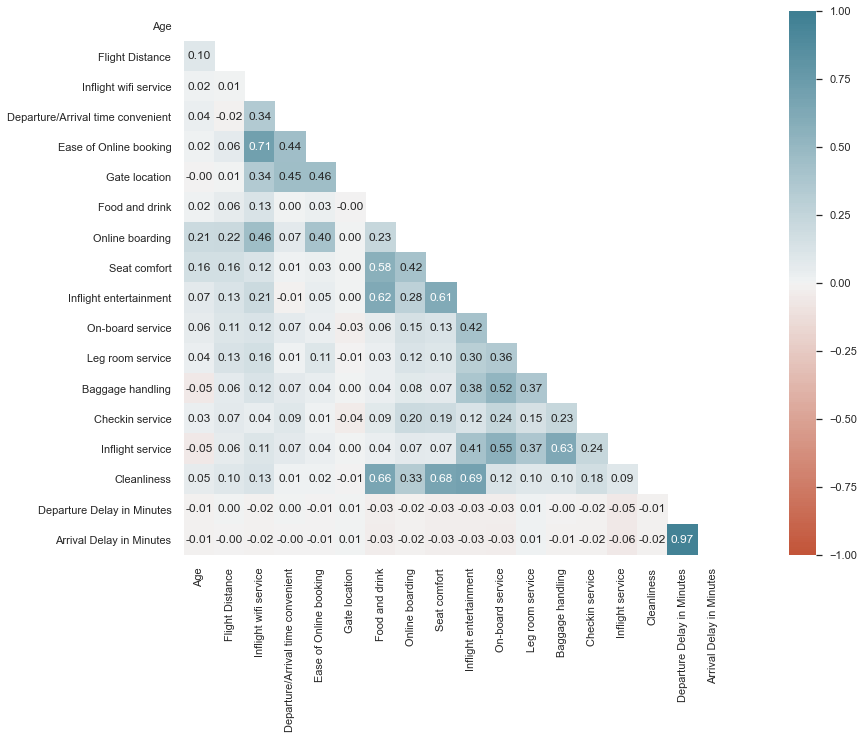

In [27]:
plt.figure(figsize=(22,10))
corr_matrix=df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),mask=mask,square=True,annot=True,fmt='.2f')
plt.show()

Some service ratings have a correlation above 60%, but in reality they are not related and just coincidentally correlated. Arrival Delay in Minutes and Arrival Delay in Minutes have a high correlation because when the departure time is too late, it will have an impact on the arrival time.

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

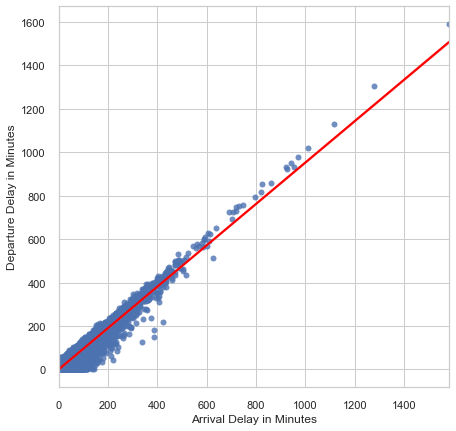

In [28]:
sns.regplot(x="Arrival Delay in Minutes", y="Departure Delay in Minutes", data=df, line_kws={"color": "red"})

The two features are linearly positive correlated as previously described.

## PRE-PROCESSING

### Scaling numerical data

Scaling is needed to make all numerical features in the same range and seen as equal by the model later.

In [29]:
df_set = df[['Type of Travel','Customer Type','satisfaction','Gender','Class']]
df_tonorm = df[['Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes']]

for column in df_tonorm.columns:
    df_tonorm[column] = (df_tonorm[column] - df_tonorm[column].min()) / (df_tonorm[column].max() - df_tonorm[column].min())    

df = pd.concat([df_set, df_tonorm], axis=1)

### Categorical Data Encoding

Data encoding is needed to make it easier for the Machine Learning Model to read the data that we present.

In [30]:
df = df.dropna().reset_index(drop=True)
df['Gender'] = df['Gender'].replace("Male", 0).replace("Female", 1)
df['Customer Type'] = df['Customer Type'].replace("Loyal Customer", 0).replace("disloyal Customer", 1)
df['Type of Travel'] = df['Type of Travel'].replace("Business travel", 0).replace("Personal Travel", 1)
df['satisfaction'] = df['satisfaction'].replace("neutral or dissatisfied", 0).replace("satisfied", 1)
df =pd.get_dummies(data=df,columns=['Class'],drop_first=True)
df.head()

,Type of Travel,Customer Type,satisfaction,Gender,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Class_Eco,Class_Eco Plus
0,1,0,0,0,0.086632,0.6,0.8,0.6,0.2,1.0,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0,1
1,0,1,0,0,0.041195,0.6,0.4,0.6,0.6,0.2,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0,0
2,0,0,1,1,0.224354,0.4,0.4,0.4,0.4,1.0,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0,0
3,0,0,0,1,0.107229,0.4,1.0,1.0,1.0,0.4,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0,0
4,0,0,1,0,0.036955,0.6,0.6,0.6,0.6,0.8,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0,0


### Data Balance Check

In [31]:
target = df['satisfaction'].value_counts().reset_index()
target.rename(columns={'index':'satisfaction','satisfaction':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,satisfaction,freq,percentage
0,0,73225,56.55
1,1,56262,43.45


The target is approximately balanced.

### Splitting Data

In [32]:
df = df.astype(float)
X = df.drop(['satisfaction'],axis = 1)
Y = df['satisfaction']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

## MACHINE LEARNING MODELING

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [35]:
# kfold = StratifiedKFold(n_splits=10)
# random_state = 2
# classifiers = []
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(SVC(random_state=random_state))
# classifiers.append(DecisionTreeClassifier(random_state=random_state))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
# classifiers.append(RandomForestClassifier(random_state=random_state))
# classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(XGBClassifier(random_state=random_state))

# cv_results = []
# for classifier in classifiers :
#     cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

# cv_means = []
# cv_std = []
# for cv_result in cv_results:
#     cv_means.append(cv_result.mean())
#     cv_std.append(cv_result.std())

# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","KNeighbors","SVC","DecisionTree","AdaBoost",
# "RandomForest","GradientBoosting","XGBoost"]})

# g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
# g.set_xlabel("Mean Accuracy")
# g = g.set_title("Cross validation scores")

Cross-validation is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. 

Based on the graph above, the model with the highest cross validation score is:
1. XGBoost
2. Random Forest
3. SVC
4. Gradient Boosting

Of the four models, we will compare which one is the most suitable for use in this case.

#### Confusion Matrix Function

In [37]:
def con_mat(con):
    group_names = ["True Negative","False Positive","False Negative","True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in con.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in con.flatten()/np.sum(con)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax=sns.heatmap(con, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
    ax.set_xlabel('Predicted Label',fontsize = 15)
    ax.set_ylabel('Actual Label',fontsize = 15)
    plt.show()

### XGBoost - Extreme Gradient Boosting

In [38]:
model_xgb = XGBClassifier(random_state =2)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

[22:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14668
         1.0       0.97      0.94      0.95     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



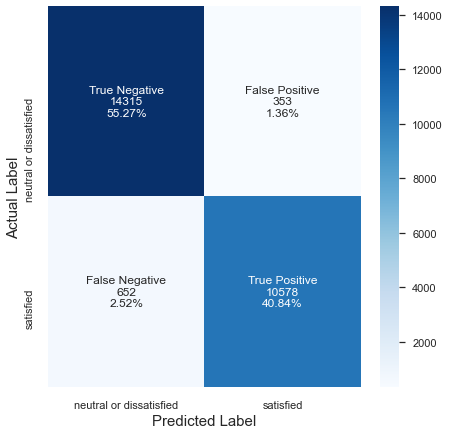

In [39]:
print(classification_report(y_test,pred_xgb))

xgb_con = confusion_matrix(y_test,pred_xgb)
con_mat(xgb_con)

### Random Forest

In [40]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     14668
         1.0       0.97      0.94      0.95     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



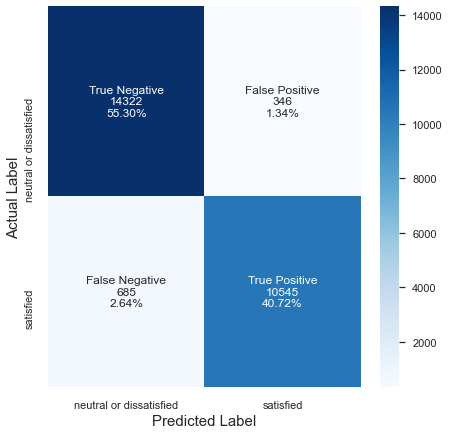

In [41]:
print(classification_report(y_test, preds))

rf_con = confusion_matrix(y_test, preds)
con_mat(rf_con)

### Linear SVC - Support Vector Classification

In [42]:
svc=LinearSVC()
parameters={"C":[0.01,0.1,1,10]}
searcher=GridSearchCV(svc,parameters,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_svc=searcher.best_estimator_
pred_svc = best_model_svc.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     14668
         1.0       0.87      0.84      0.85     11230

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898



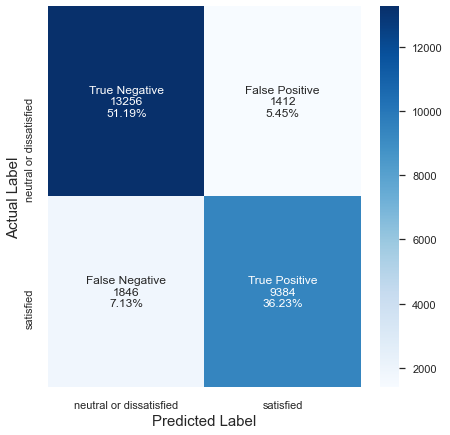

In [43]:
print(classification_report(y_test,pred_svc))

svc_con = confusion_matrix(y_test,pred_svc)
con_mat(svc_con)

### Stochastic Gradient Boosting Classifier

In [44]:
sgb=GradientBoostingClassifier(n_estimators=300,max_depth=11,subsample=0.8,max_features=0.6,random_state=42).fit(X_train,y_train)
pred_sgb=sgb.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     14668
         1.0       0.97      0.94      0.95     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



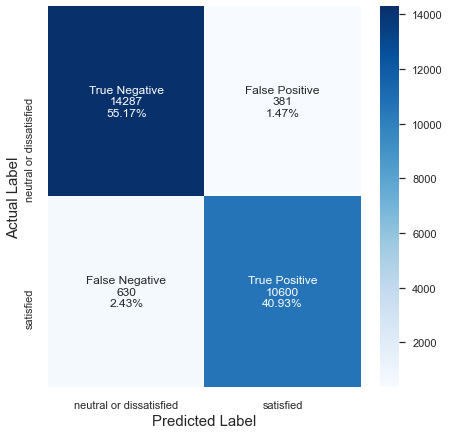

In [45]:
print(classification_report(y_test,pred_sgb))

sgb_con = confusion_matrix(y_test,pred_sgb)
con_mat(sgb_con)

### Model Conclusion
The model chosen is the Extreme Gradient Boosting (XGBoost) algorithm because it has the highest accuracy rate (96%) and the second-lowest False Negative error rate (2.49%), wherein this case the more we do not detect dissatisfied customers, the worse it will be because corrective action cannot be taken.

### Feauture Importances

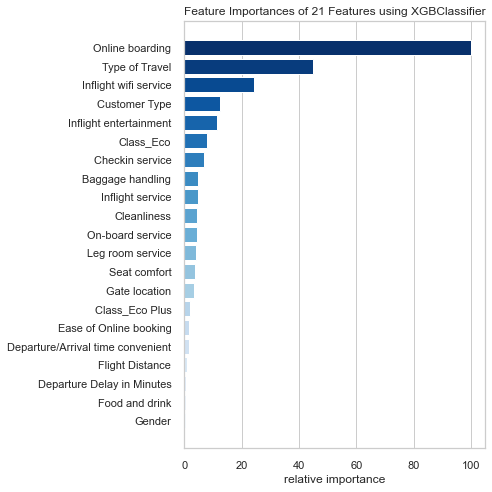

<AxesSubplot:title={'center':'Feature Importances of 21 Features using XGBClassifier'}, xlabel='relative importance'>

In [50]:
fi = FeatureImportances(model_xgb, ylabel='Feautures', colormap= 'Blues')
fi.fit(X_train, y_train)
fi.show()

3 Most Impactful Features:
1. Online Boarding
2. Type of Travel
3. Inflight Wifi Service

## IMPROVEMENT SIMULATION BASED ON ANALYSIS
In this simulation, the rating will be increased on the Online Boarding and Inflight Wifi Service features. While on Inflight Wifi Service feature will be converting a small portion (about 3%) from "Personal Travel" to "Business Travel". From there it will be analyzed regarding the changes that occur in customer satisfaction.

In [47]:
df_new = df.copy()
df_x = df_new.copy()
df_new["Online boarding"] = df_new["Online boarding"].apply(lambda x: x+0.4 if x < 0.8 else x)
df_new["Inflight wifi service"] = df_new["Inflight wifi service"].apply(lambda x: x+0.4 if x < 0.8 else x)

seed(1)
sequence = [i for i in range(129487)]
subset = sample(sequence, 10000)

df_new.loc[subset,'Type of Travel'] = 0

### Splitting Improved Dataset

In [48]:
X_sim = df_new.drop(['satisfaction'],axis = 1)
Y_sim = df_new['satisfaction']

### Modeling the Target from Improved Dataset
Using Previous XGBoost Model

In [49]:
pred_xgb_sim = model_xgb.predict(X_sim)

(unique, counts_sim) = np.unique(pred_xgb_sim, return_counts=True)
(unique, counts_df) = np.unique(df['satisfaction'], return_counts=True)

sat_df = round((counts_df[1]/129487)*100,2)
sat_sim = round((counts_sim[1]/129487)*100,2)
dif_sat = round((sat_sim-sat_df),2)
per = '%'
print('Before improvement, the percentage of the satisfied customers is %s%s' % (sat_df, per))
print('But after we consider the top 3 feature that affects customers satisfaction, which is:')
print('- Online Boarding Satisfaction Rating \n- Inflight wifi service Satisfaction Rating \n- Type of Travel \n')
print('The percentage of the satisfied customers became %s%s' % (sat_sim, per))
print('So it can be said that customer satisfaction has increased by %s%s' % (dif_sat, per))


Before improvement, the percentage of the satisfied customers is 43.45%
But after we consider the top 3 feature that affects customers satisfaction, which is:
- Online Boarding Satisfaction Rating 
- Inflight wifi service Satisfaction Rating 
- Type of Travel 

The percentage of the satisfied customers became 64.51%
So it can be said that customer satisfaction has increased by 21.06%


### Actionable Recommendation to Make Improvement Come True

1. Increase Online Boarding Satisfaction Rating
    - Creating an online boarding platform that can be accessed via smartphones
    - Giving "something" to customers boarding via online
    - Ensure that the online boarding platform is easy to use and has no bugs


2. Increase Inflight wifi service Satisfaction Rating 
    - Provides inflight wifi service on all airline fleets
    - Ensure stable and fast Wifi network speed
    - Ensure the Wifi network covers the entire plane


3. Increase Business Travel Frequency
    - Giving discounts/souvenirs to customers who are on business travel
    - Collaborating with various companies as their air transportation providers
    - Providing services and infrastructure that support customers who are on a business travel
